In [1]:
import matplotlib as plt
import pandas as pd
import os
import scanpy as sc
import numpy as np
import iqcell
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import matplotlib.cbook as cbook
from collections.abc import Iterable
cbook.iterable = lambda obj: isinstance(obj, Iterable)
from collections.abc import Iterable
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

HI
iqcell successfully imported


In [2]:
Data_add='/home/hjlee/pyboolnet_simulation/2025.05/20250521_renal_counts.csv'
expression_add_magic='/home/hjlee/pyboolnet_simulation/20250521_magic_expression.csv'

In [3]:
knn_value=10
emt_magic,magic_op=iqcell.expression_recovery.run_magic_and_write_data(Data_add,knn_value,expression_add_magic)

Calculating MAGIC...
  Running MAGIC on 11288 cells and 16448 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 7.30 seconds.
    Calculating KNN search...
    Calculated KNN search in 13.25 seconds.
    Calculating affinities...
    Calculated affinities in 13.48 seconds.
  Calculated graph and diffusion operator in 34.69 seconds.
  Running MAGIC with `solver='exact'` on 16448-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 8.42 seconds.
Calculated MAGIC in 43.64 seconds.


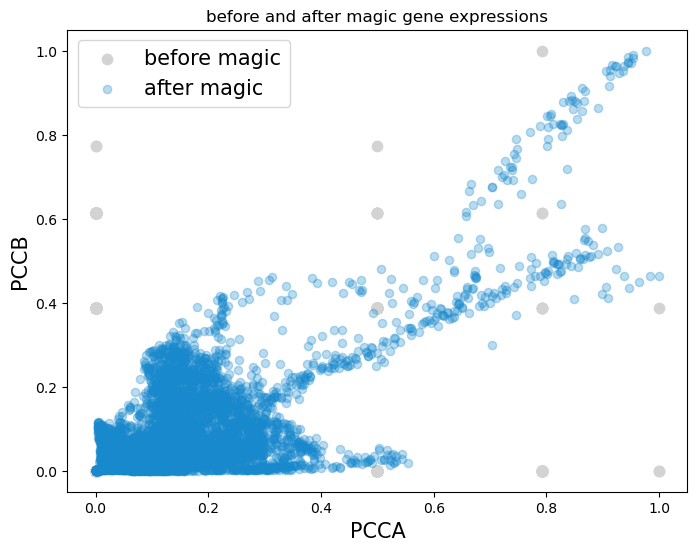

In [7]:
gene1='PCCA'
gene2='PCCB'
# this plots the expression relation between two genes, before and after the magic
Fig=iqcell.expression_recovery.plot_magic(gene1,gene2,knn_value,emt_magic,magic_op,Data_add,plot_DREMI=False)

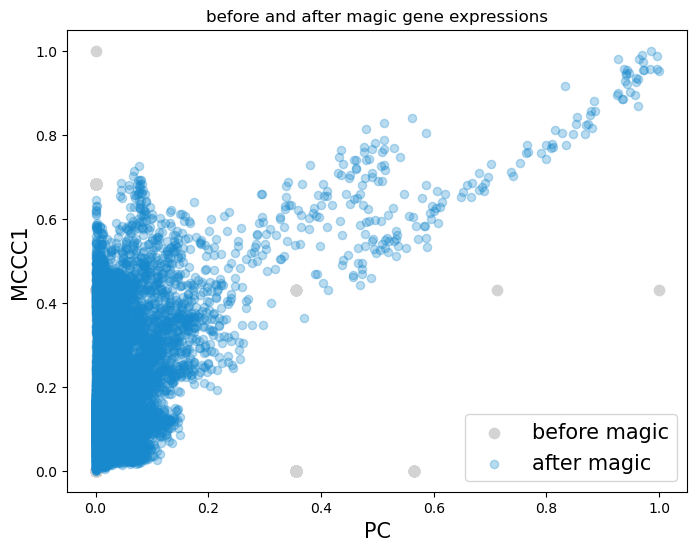

In [8]:
gene1='PC'
gene2='MCCC1'
# this plots the expression relation between two genes, before and after the magic
Fig=iqcell.expression_recovery.plot_magic(gene1,gene2,knn_value,emt_magic,magic_op,Data_add,plot_DREMI=False)

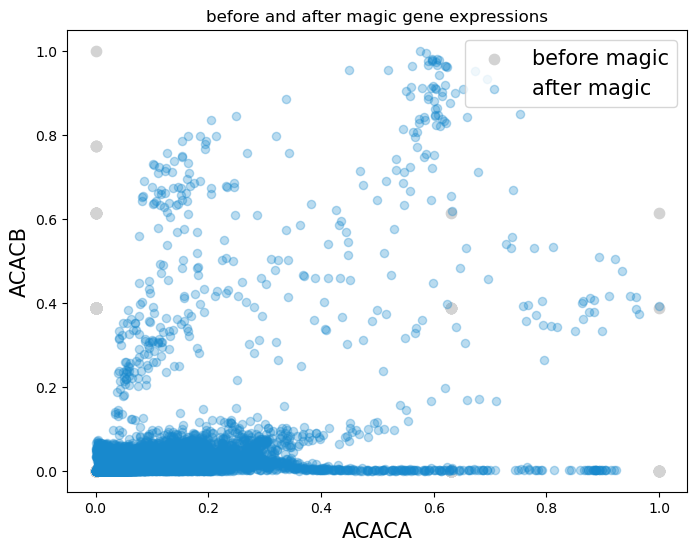

In [9]:
gene1='ACACA'
gene2='ACACB'
# this plots the expression relation between two genes, before and after the magic
Fig=iqcell.expression_recovery.plot_magic(gene1,gene2,knn_value,emt_magic,magic_op,Data_add,plot_DREMI=False)

In [4]:
BC_domain = ['PC','PCCA','PCCB','MCCC1','ACACA','ACACB']
emt_magic.index


Index(['5739STDY7958793_CTACCCAGTCCCTACT-1',
       '5739STDY7958794_ACATCAGTCTCCAACC-1',
       '5739STDY7958794_ACCCACTAGAGTCTGG-1',
       '5739STDY7958794_AGCCTAAAGCTAGTCT-1',
       '5739STDY7958794_AGGGTGACAGCATGAG-1',
       '5739STDY7958794_CACACAATCAACCATG-1',
       '5739STDY7958794_CATGACATCTCGCTTG-1',
       '5739STDY7958794_CGCCAAGCATCGGAAG-1',
       '5739STDY7958794_CGGACGTCAAGCCCAC-1',
       '5739STDY7958794_CGTCAGGTCTTTAGTC-1',
       ...
       '5739STDY9266997_TACTTGTGTACCATCA-1',
       '5739STDY9266997_TCATTACAGGTGTTAA-1',
       '5739STDY9266997_TCGCGTTGTTGCGCAC-1',
       '5739STDY9266997_TCTTCGGAGTCGAGTG-1',
       '5739STDY9266997_TGAGAGGGTCTAGAGG-1',
       '5739STDY9266997_TGCGCAGAGATCCGAG-1',
       '5739STDY9266997_TGCTACCAGTGGAGAA-1',
       '5739STDY9266997_TTCTCCTTCCTTAATC-1',
       '5739STDY9266997_TTGACTTCACCCAGTG-1',
       '5739STDY9266997_TTTGCGCGTCTGCGGT-1'],
      dtype='object', length=11288)

In [5]:
dfumap = pd.DataFrame(index=emt_magic.index)
dfumap['egln3'] = emt_magic['EGLN3']
mean_egl = dfumap['egln3'].mean()
median_egl = dfumap['egln3'].median()
dfumap['EGLN3_expression_mean'] = np.where(dfumap['egln3'] > mean_egl, 'High', 'Low')
dfumap['EGLN3_expression_median'] = np.where(dfumap['egln3'] > median_egl, 'High', 'Low')
dfumap['pc_sig'] = emt_magic[BC_domain].mean(axis=1)
dfumap


,egln3,EGLN3_expression_mean,EGLN3_expression_median,pc_sig
5739STDY7958793_CTACCCAGTCCCTACT-1,0.638081,Low,Low,0.011879
5739STDY7958794_ACATCAGTCTCCAACC-1,0.015009,Low,Low,0.044749
5739STDY7958794_ACCCACTAGAGTCTGG-1,0.013739,Low,Low,0.036723
5739STDY7958794_AGCCTAAAGCTAGTCT-1,0.105625,Low,Low,0.032590
5739STDY7958794_AGGGTGACAGCATGAG-1,0.011954,Low,Low,0.036933
...,...,...,...,...
5739STDY9266997_TGCGCAGAGATCCGAG-1,0.176105,Low,Low,0.037906
5739STDY9266997_TGCTACCAGTGGAGAA-1,0.206769,Low,Low,0.075885
5739STDY9266997_TTCTCCTTCCTTAATC-1,0.135749,Low,Low,0.038392
5739STDY9266997_TTGACTTCACCCAGTG-1,0.175346,Low,Low,0.043459


In [9]:

print(mean_egl)
print(median_egl)

0.8119766825231809
0.8058738387859165


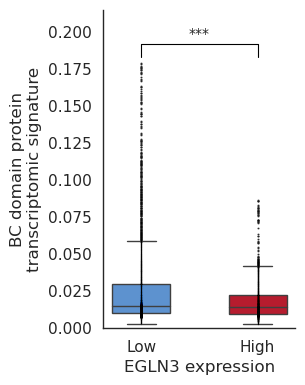

In [10]:
def significance_label(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "n.s."

# 스타일 지정
sns.set(style="white", context="paper", font_scale=1.2)

# 분석
low_vals = dfumap[dfumap['EGLN3_expression_mean'] == 'Low']['pc_sig']
high_vals = dfumap[dfumap['EGLN3_expression_mean'] == 'High']['pc_sig']
stat, p = ttest_ind(low_vals, high_vals, equal_var=False)
sig_label = significance_label(p)

# 플롯 시작
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(3.2, 4))  # 논문 column 사이즈 고려

# Boxplot
sns.boxplot(data=dfumap, x='EGLN3_expression_mean', y='pc_sig',
            palette={'Low': '#4A90E2', 'High': '#D0021B'},  # 고대비 컬러
            width=0.5, linewidth=1.0, fliersize=0.5)

# Stripplot
sns.stripplot(data=dfumap, x='EGLN3_expression_mean', y='pc_sig',
              color='black', size=0.8, jitter=False, alpha=0.3)

# 축 라벨
plt.xlabel("EGLN3 expression", fontsize=12)
plt.ylabel("BC domain protein\ntranscriptomic signature", fontsize=12)
# 유의성 꺾쇠 표시
x1, x2 = 0, 1
y = dfumap['pc_sig'].max() * 1.02
h = dfumap['pc_sig'].max() * 0.05  # 충분히 높게 설정

bracket_x = [x1, x1, x2, x2]
bracket_y = [y, y+h, y+h, y]
plt.plot(bracket_x, bracket_y, color='black', lw=0.8)
plt.text((x1 + x2)/2, y + h + h*0.3, sig_label,
         ha='center', va='bottom', fontsize=10)

# 스타일 마무리
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, dfumap['pc_sig'].max() * 1.2)
sns.despine()
plt.tight_layout()
plt.show()

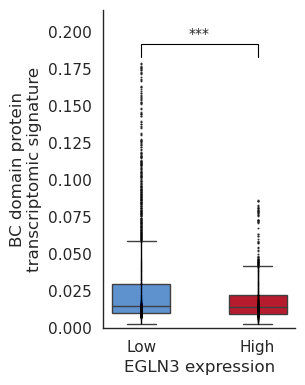

In [11]:
def significance_label(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "n.s."

# 스타일 지정
sns.set(style="white", context="paper", font_scale=1.2)

# 분석
low_vals = dfumap[dfumap['EGLN3_expression_median'] == 'Low']['pc_sig']
high_vals = dfumap[dfumap['EGLN3_expression_median'] == 'High']['pc_sig']
stat, p = ttest_ind(low_vals, high_vals, equal_var=False)
sig_label = significance_label(p)

# 플롯 시작
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(3.2, 4))  # 논문 column 사이즈 고려

# Boxplot
sns.boxplot(data=dfumap, x='EGLN3_expression_median', y='pc_sig',
            palette={'Low': '#4A90E2', 'High': '#D0021B'},  # 고대비 컬러
            width=0.5, linewidth=1.0, fliersize=0.5)

# Stripplot
sns.stripplot(data=dfumap, x='EGLN3_expression_median', y='pc_sig',
              color='black', size=0.8, jitter=False, alpha=0.3)

# 축 라벨
plt.xlabel("EGLN3 expression", fontsize=12)
plt.ylabel("BC domain protein\ntranscriptomic signature", fontsize=12)

# 유의성 꺾쇠 표시
x1, x2 = 0, 1
y = dfumap['pc_sig'].max() * 1.02
h = dfumap['pc_sig'].max() * 0.05  # 충분히 높게 설정

bracket_x = [x1, x1, x2, x2]
bracket_y = [y, y+h, y+h, y]
plt.plot(bracket_x, bracket_y, color='black', lw=0.8)
plt.text((x1 + x2)/2, y + h + h*0.3, sig_label,
         ha='center', va='bottom', fontsize=10)

# 스타일 마무리
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, dfumap['pc_sig'].max() * 1.2)
sns.despine()
plt.tight_layout()
plt.show()